In [1]:
pip install -q wordcloud bnlp_toolkit

Note: you may need to restart the kernel to use updated packages.


In [2]:
import datasets
from datasets import load_dataset
import numpy as np
import pandas as pd
import cv2, os
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bnlp.corpus import stopwords, punctuations

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
raw_datasets = load_dataset("khondoker/SentNoB")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/khondoker--SentNoB-1d4e2e75659b8316/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


/opt/conda/lib/python3.10/site-packages/datasets/packaged_modules/csv/csv.py:154: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  csv_file_reader = pd.read_csv(file, iterator=True, dtype=dtype, **self.config.read_csv_kwargs)
/opt/conda/lib/python3.10/site-packages/datasets/packaged_modules/csv/csv.py:154: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  csv_file_reader = pd.read_csv(file, iterator=True, dtype=dtype, **self.config.read_csv_kwargs)
/opt/conda/lib/python3.10/site-packages/datasets/packaged_modules/csv/csv.py:154: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  csv_file_reader = pd.read_csv(file, iterator=True, dtype=dtype, **self.config.read_csv_

  0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
raw_datasets.set_format("pandas")

In [5]:
df = raw_datasets['train'][:]

In [6]:
df.head()

,Data,Label
0,"স্বাস্থ্যবান হতে চাই , আমি বয়সের তুলনায় অনেক ব...",0
1,ভাইয়া নতুন ভিডিও আসে না কেন,0
2,সৌরভ গাঙ্গুলী ছাড়া দাদাগিরি কখনো জমে উঠত না,0
3,ক্রিকেট কে বাচাতে হলে পাপকে অতিশিগ্রিই তাকেও গ...,2
4,আমিতো সেই ঝালপ্রিয়ো মানুষ,1


In [7]:
raw_datasets.reset_format()
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['Data', 'Label'],
        num_rows: 15728
    })
})

In [8]:
def clean(text):
    text = re.sub('[%s]' % re.escape(punctuations), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\xa0', '', text)
    return text
cleaned_text = df['Data'].apply(lambda x: clean(str(x)))

In [9]:
refined_sentence = " ".join(cleaned_text)

In [10]:
def get_mask(img_path):
    if not os.path.exists(img_path):
        raise FileNotFoundError("Image does not exist")

    img = cv2.imread(img_path, -1)
    if img is None:
        raise IOError("Image could not be read")

    if img.shape[2] == 3:
        return img
    return cv2.bitwise_not(img[:, :, 3])

try:
    mask = get_mask("/kaggle/input/wodcloud-twiter-pic/twitter.png")
    print("sucessfully mask has been loaded")
except FileNotFoundError as e:
    print(e)
except IOError as e:
    print(e)



sucessfully mask has been loaded


In [11]:
#mask = get_mask("/kaggle/input/wodcloud-twiter-pic/twitter.png")

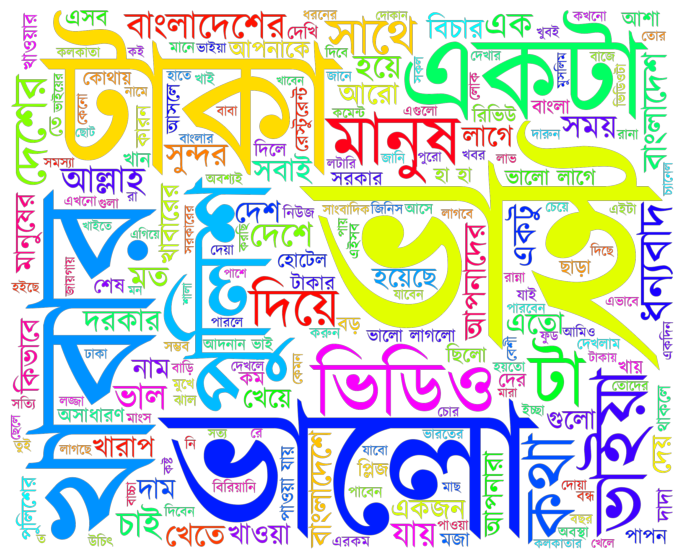

In [12]:
#mask = get_mask("")
regex = r"[\u0980-\u09FF]+"
wc = WordCloud(width=800, height=400,mode="RGBA",background_color=None, colormap="hsv", mask = mask,stopwords = stopwords,
font_path="/kaggle/input/kalpurush-fonts/kalpurush-2.ttf", regexp=regex).generate(refined_sentence)
plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
result = wc.to_file("SentNoB_word_cloud.png")